In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os, numpy, PIL
from PIL import Image
import shutil

sns.set(style="whitegrid")

In [2]:
# Read the csv where I left off after scraping and putting the data into a dataframe
df965 = pd.read_csv('data/korean_male_actors (965).csv')

In [3]:
df965

,name,hearts,pic
0,Lee Min Ho,14094,https://i.mydramalist.com/kEpQwc.jpg
1,Lee Jong Suk,21065,https://i.mydramalist.com/eLBmQ_5c.jpg
2,Ji Chang Wook,17145,https://i.mydramalist.com/ZyyEJ_5c.jpg
3,Song Joong Ki,14810,https://i.mydramalist.com/1kymd_5c.jpg
4,Kim Soo Hyun,14528,https://i.mydramalist.com/WonJO_5c.jpg
...,...,...,...
960,Ajoo,9,https://i.mydramalist.com/gO16vc.jpg
961,Lee Jung Hoon,1,https://i.mydramalist.com/rqYyyc.jpg
962,Son Seong Jun,26,https://i.mydramalist.com/ZeDx8_5c.jpg
963,Cha Hyun Woo,4,https://i.mydramalist.com/WrEjRc.jpg


In [4]:
# Show basic statistics
df965.describe()

,hearts
count,965.000000
mean,776.155440
std,1990.410523
min,1.000000
25%,43.000000
50%,131.000000
75%,468.000000
max,21065.000000


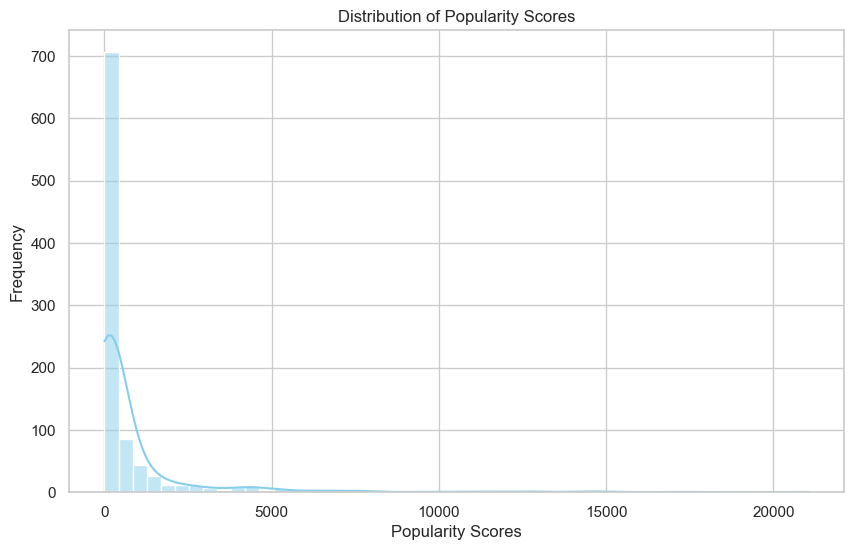

In [4]:
# Create a histogram to visualize the distribution of 'Hearts' column
plt.figure(figsize=(10,6))
sns.histplot(df965['hearts'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Scores')
plt.ylabel('Frequency')
plt.show()

The popularity scores are highly skewed to the right. A large number of actors have popularity scores at the lower end of the range, with a few actors having extremely high popularity scores.

Given the skewed nature of the data, it would not be statistically sound to simply divide the actors into three tiers using the mean or median values. A more appropriate method would be to use percentiles or quartiles.

With this, I will divide the actors into three tiers with the following approach:

- Very Popular Tier: Actors whose popularity scores are in the top 25% (i.e., above the third quartile, Q3).
- Mildly Popular Tier: Actors whose popularity scores are between the first and third quartiles (i.e., between Q1 and Q3).
- Not So Popular Tier: Actors whose popularity scores are in the bottom 25% (i.e., below the first quartile, Q1)

In [6]:
# Define the quartile values
Q1 = df965['hearts'].quantile(0.25)
Q3 = df965['hearts'].quantile(0.75)

In [7]:
# Create a new column 'Tier' and assign the tiers based on the popularity score
df965['tier'] = pd.cut(df965['hearts'], bins=[0, Q1, Q3, np.inf], labels=['not so popular', 'mildly popular', 'very popular'])

In [8]:
# Check the updated dataframe
df965[df965['tier']=='mildly popular']

,name,hearts,pic,tier
119,Kim Sun Woong,249,https://i.mydramalist.com/jpDyw_5c.jpg,mildly popular
122,Kim Joon,436,https://i.mydramalist.com/QyDY6_5c.jpg,mildly popular
130,Oh Ji Ho,425,https://i.mydramalist.com/qoXnzc.jpg,mildly popular
136,Kim Jeong Hoon,263,https://i.mydramalist.com/d0x50c.jpg,mildly popular
139,Jo Hyun Jae,313,https://i.mydramalist.com/PxyZwc.jpg,mildly popular
...,...,...,...,...
942,Lee Gi Young,73,https://i.mydramalist.com/Qlpw2_5c.jpg,mildly popular
947,Ravi,146,https://i.mydramalist.com/BdrgY6_5c.jpg,mildly popular
957,Kim Hyun Bin,66,https://i.mydramalist.com/XEn6J_5c.jpg,mildly popular
959,Kim Young Min,383,https://i.mydramalist.com/pgZJV_5c.jpg,mildly popular


In [18]:
# # Save the new tiered dataframe to a new csv file
# df965.to_csv('data/korean_male_actors (965)_tiered.csv', index=False)

In [9]:
# Count the number of actors in each tier
tier_counts = df965['tier'].value_counts()
tier_counts

mildly popular    475
not so popular    249
very popular      241
Name: tier, dtype: int64

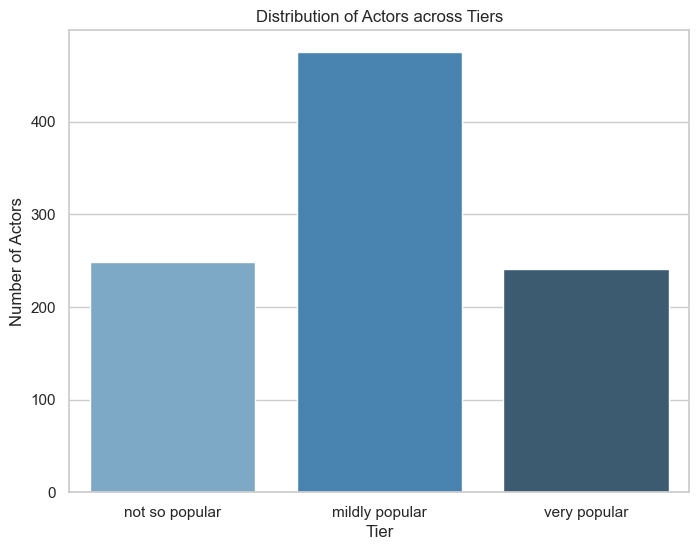

In [10]:
# Create a bar plot to visualize the distribution across the tiers
plt.figure(figsize=(8,6))
sns.barplot(x=tier_counts.index, y=tier_counts.values, palette="Blues_d")
plt.title('Distribution of Actors across Tiers')
plt.xlabel('Tier')
plt.ylabel('Number of Actors')
plt.show()

The "very popular" tier represents the top 25% of the popularity scores.

The "mildly popular" tier has the largest number of actors. These are the actors whose popularity scores fall between the first and third quartiles.

The "not so popular" tier represents the bottom 25% of the popularity scores. The number of actors in this tier is roughly equal to the number in the "Very Popular" tier.

___

In the interest of generating a machine learning prototype, I will focus on the "very popular" tier and "not so popular tier" for now.

The "mildly popular" tier will be incorporated in future works, along with supplementing much more face images to refine the existing machine learning model.

In [16]:
# Make a new dataframe without the "mildly popular" tier
df490 = df965[df965['tier']!='mildly popular']
df490

,name,hearts,pic,tier
0,Lee Min Ho,14094,https://i.mydramalist.com/kEpQwc.jpg,very popular
1,Lee Jong Suk,21065,https://i.mydramalist.com/eLBmQ_5c.jpg,very popular
2,Ji Chang Wook,17145,https://i.mydramalist.com/ZyyEJ_5c.jpg,very popular
3,Song Joong Ki,14810,https://i.mydramalist.com/1kymd_5c.jpg,very popular
4,Kim Soo Hyun,14528,https://i.mydramalist.com/WonJO_5c.jpg,very popular
...,...,...,...,...
958,Yang Young Jo,1,https://i.mydramalist.com/qqK00c.jpg,not so popular
960,Ajoo,9,https://i.mydramalist.com/gO16vc.jpg,not so popular
961,Lee Jung Hoon,1,https://i.mydramalist.com/rqYyyc.jpg,not so popular
962,Son Seong Jun,26,https://i.mydramalist.com/ZeDx8_5c.jpg,not so popular


In [19]:
# Save dataframe to a new csv file
df490.to_csv('data/korean_male_actors (490)_tiered.csv', index=False)

## Generate an "Average" face for each tier based on the faces of all actors in the respective tiers

In [12]:
IMG_DIR = 'three tiers of popularities/very popular'
arr=numpy.zeros((360,300,3),float)
# Check if the path is a directory
if os.path.isdir(IMG_DIR):
    # Iterate over each image in the tier's directory
    for img_name in os.listdir(IMG_DIR):
        # Create the full path to the image
        img_path = os.path.join(IMG_DIR, img_name)

        # Open and resize the image
        img = Image.open(img_path).resize((300, 360))

        # Convert the image to a numpy array and preprocess it for VGG16
        img_array = np.array(img)
        
        arr=arr+img_array/241

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("data/average_very_popular.png")
out.show()

In [13]:
IMG_DIR = 'three tiers of popularities/not so popular'
arr=numpy.zeros((360,300,3),float)
# Check if the path is a directory
if os.path.isdir(IMG_DIR):
    # Iterate over each image in the tier's directory
    for img_name in os.listdir(IMG_DIR):
        # Create the full path to the image
        img_path = os.path.join(IMG_DIR, img_name)

        # Open and resize the image
        img = Image.open(img_path).resize((300, 360))

        # Convert the image to a numpy array and preprocess it for VGG16
        img_array = np.array(img)
        
        arr=arr+img_array/249

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("data/average_not_so_popular.png")
out.show()

In [8]:
IMG_DIR = 'three tiers of popularities/mildly popular'
arr=numpy.zeros((360,300,3),float)
# Check if the path is a directory
if os.path.isdir(IMG_DIR):
    # Iterate over each image in the tier's directory
    for img_name in os.listdir(IMG_DIR):
        # Create the full path to the image
        img_path = os.path.join(IMG_DIR, img_name)

        # Open and resize the image
        img = Image.open(img_path).resize((300, 360))

        # Convert the image to a numpy array and preprocess it for VGG16
        img_array = np.array(img)
        
        arr=arr+img_array/475

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("data/average_mildly_popular.png")
out.show()

## Generate an "Average" face for each tier based on 20 faces of actors in the respective tiers

In [7]:
IMG_DIR = 'data/top 20 very popular'
arr=numpy.zeros((360,300,3),float)
# Check if the path is a directory
if os.path.isdir(IMG_DIR):
    # Iterate over each image in the tier's directory
    for img_name in os.listdir(IMG_DIR):
        # Create the full path to the image
        img_path = os.path.join(IMG_DIR, img_name)

        # Open and resize the image
        img = Image.open(img_path).resize((300, 360))

        # Convert the image to a numpy array and preprocess it for VGG16
        img_array = np.array(img)
        
        arr=arr+img_array/20

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("data/top_20_average_very_popular.png")
out.show()

In [9]:
IMG_DIR = 'data/sample 20 not so popular'
arr=numpy.zeros((360,300,3),float)
# Check if the path is a directory
if os.path.isdir(IMG_DIR):
    # Iterate over each image in the tier's directory
    for img_name in os.listdir(IMG_DIR):
        # Create the full path to the image
        img_path = os.path.join(IMG_DIR, img_name)

        # Open and resize the image
        img = Image.open(img_path).resize((300, 360))

        # Convert the image to a numpy array and preprocess it for VGG16
        img_array = np.array(img)
        
        arr=arr+img_array/20

# Round values in array and cast as 8-bit integer
arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("data/sample_20_average_not_so_popular.png")
out.show()

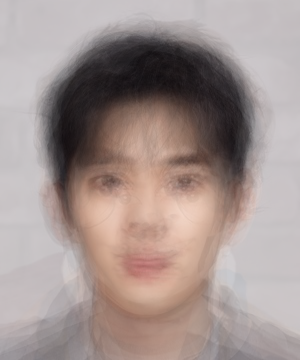

The average face of top 20 very popular actors appear to have a certain form.

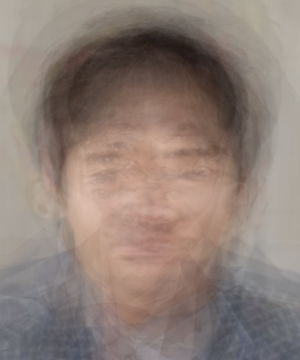
Whereas the average face of 20 actors in the not so popular class are comparatively blurry.

## Below are codes to copy the photos of each actors into a new folder corresponding to their popularity tier

In [14]:
# Path of the source and destination folders
src_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\pics"
dst_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\very popular"

# Create the destination folder if it does not exist
os.makedirs(dst_folder, exist_ok=True)

# Filter the DataFrame to only include rows where 'tier' is "very popular"
popular_df = df965[df965['tier'] == 'very popular']

# For each row in the filtered DataFrame
for _, row in popular_df.iterrows():
    # Get the filename (add .jpg extension)
    filename = f"{row['name']}.jpg"
    
    # Full path of the source and destination files
    src_file = os.path.join(src_folder, filename)
    dst_file = os.path.join(dst_folder, filename)

    # If the source file exists, move it to the destination folder
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)

In [15]:
# Path of the source and destination folders
src_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\pics"
dst_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\mildly popular"

# Create the destination folder if it does not exist
os.makedirs(dst_folder, exist_ok=True)

# Filter the DataFrame to only include rows where 'tier' is "very popular"
popular_df = df965[df965['tier'] == 'mildly popular']

# For each row in the filtered DataFrame
for _, row in popular_df.iterrows():
    # Get the filename (add .jpg extension)
    filename = f"{row['name']}.jpg"
    
    # Full path of the source and destination files
    src_file = os.path.join(src_folder, filename)
    dst_file = os.path.join(dst_folder, filename)

    # If the source file exists, move it to the destination folder
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)

In [16]:
# Path of the source and destination folders
src_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\pics"
dst_folder = r"C:\Users\Jackson\OneDrive\Documents\DSI\Capstone Project\not so popular"

# Create the destination folder if it does not exist
os.makedirs(dst_folder, exist_ok=True)

# Filter the DataFrame to only include rows where 'tier' is "very popular"
popular_df = df965[df965['tier'] == 'not so popular']

# For each row in the filtered DataFrame
for _, row in popular_df.iterrows():
    # Get the filename (add .jpg extension)
    filename = f"{row['name']}.jpg"
    
    # Full path of the source and destination files
    src_file = os.path.join(src_folder, filename)
    dst_file = os.path.join(dst_folder, filename)

    # If the source file exists, move it to the destination folder
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)